In [1]:
# cd to base directory of this repository to enable the loading of NEURON simulations
import os
os.chdir('/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim')
from neuron import h
from neurostim.cell import Cell
from neurostim.light_classes import LightSource, LightStimulation
from neurostim.utils import convert_polar_to_cartesian_xz, interpolate
from neurostim.polarmaps import get_AP_times, simple_polar_map
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import Greys_r as cmap
from matplotlib.cm import Reds as Reds
import matplotlib
from neurostim.light_propagation_models import foutz_et_al2012
import pickle
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

# light source offsets displayed
ls_offsets = [0,150,300] #um
ls_offset = 0
light_powers = [5e-5,3e-4,5e-4, 2e-2]
#light_powers = [9e-3]

## light and neuron display
cortex_boundaries = { 
    'x': [0,1000],
    'y': [0,1000],
    'z': [-500,2000]
}
L1_x = 500
NA = 0.22
d__um = 200

N1_x = 500
N1_y = 500
scaling_neurons = 0.5
neuron_color = 'tab:blue'

# NEURON setup
h.load_file("stdrun.hoc")
h.cvode_active(1)
# load cell and create stimulation object
hoc_file = 'L5'
chanrhod_expression = 13e9
chanrhod_distribution = 'uniform'
cortical_depth = {'L5':1170}
    
cell = Cell(
    hoc_file="simneurostim/model/hoc/" + str(hoc_file) + ".hoc",
    cortical_depth=cortical_depth,
    ChR_soma_density=float(chanrhod_expression),
    ChR_distribution=str(chanrhod_distribution),
    rm_mech_from_secs=None,
    delete_all_secs_except_soma=False
)
stimulation_intensities_mWPERmm2 = np.array(light_powers)*1000 / (d__um/1000/2)**2 / np.pi # lp[mW]/(radius [mm])**2 / PI
print('stimulation intensity in mW/mm2')
for lp, si in zip(light_powers, stimulation_intensities_mWPERmm2):
    print(str(lp)+'->'+str(np.round(si,2)))

	1 
	1 
	1 
	1 
loaded simneurostim/model/hoc/L5.hoc
rotate cell by 1.5707963267948966 around y
stimulation intensity in mW/mm2
5e-05->1.59
0.0003->9.55
0.0005->15.92
0.02->636.62


In [2]:
# light power absorbed by the neuron per time at lowest light power:
#neuron_lpa = np.sum([seg.area() * 1e-8 * Tx * light_powers[0] for seg, Tx in zip(*light_stim.get_segs_Txs())]) # W
#neuron_lpa *= 1e6 # uW
# light power emitted by the source:
#fiber_lpe = light_powers[0]*1e6 # uW
# ratio of absorbed light power and emitted light power
#neuron_lpa/fiber_lpe

In [3]:
# dimensions (A4:  8.27 x 11.69 inches)
text_frac = 0.8
abs_pw = 8.27 # pagewidth
abs_pl = 11.69 # pagelength
pw = text_frac * abs_pw
pl = text_frac * abs_pl

# others
dpi=900

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:650: RuntimeWarning: invalid value encountered in true_divide
  a = (data - clim[0])/(clim[1]-clim[0])


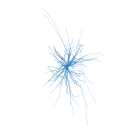

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


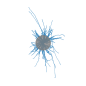

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


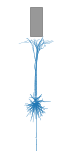

0 5e-05 total integrated conductance in nS ms 416.58994610710846


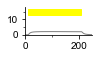

0 5e-05 abs light power in uW 3.5864816526799475


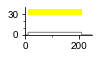

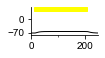

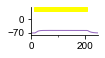

0 0.0003 total integrated conductance in nS ms 2047.2378667510445


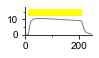

0 0.0003 abs light power in uW 21.518889916079683


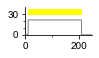

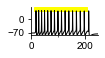

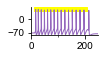

0 0.0005 total integrated conductance in nS ms 3059.5676603250377


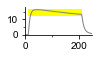

0 0.0005 abs light power in uW 35.86481652679947


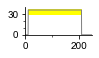

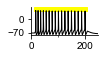

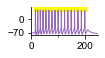

0 0.02 total integrated conductance in nS ms 22210.76467715155


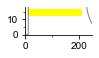

0 0.02 abs light power in uW 1434.5926610719791


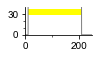

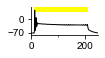

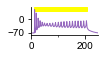

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:650: RuntimeWarning: invalid value encountered in true_divide
  a = (data - clim[0])/(clim[1]-clim[0])


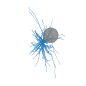

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


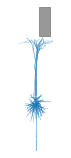

150 5e-05 total integrated conductance in nS ms 322.7049437121313


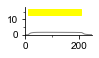

150 5e-05 abs light power in uW 2.954311036303758


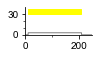

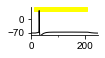

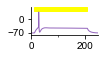

150 0.0003 total integrated conductance in nS ms 1443.9498445306995


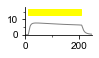

150 0.0003 abs light power in uW 17.725866217822546


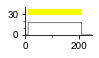

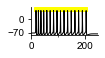

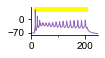

150 0.0005 total integrated conductance in nS ms 2119.789660791539


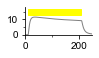

150 0.0005 abs light power in uW 29.543110363037584


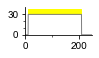

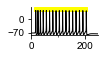

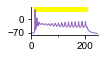

150 0.02 total integrated conductance in nS ms 17892.561160922272


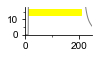

150 0.02 abs light power in uW 1181.7244145215031


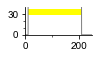

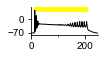

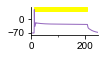

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:650: RuntimeWarning: invalid value encountered in true_divide
  a = (data - clim[0])/(clim[1]-clim[0])


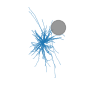

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


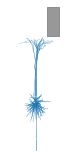

300 5e-05 total integrated conductance in nS ms 41.099678539432645


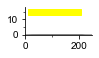

300 5e-05 abs light power in uW 0.3398722072643723


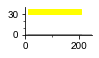

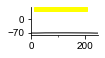

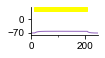

300 0.0003 total integrated conductance in nS ms 227.79872419163883


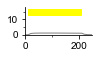

300 0.0003 abs light power in uW 2.0392332435862337


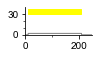

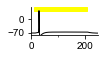

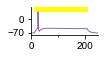

300 0.0005 total integrated conductance in nS ms 362.20016564194015


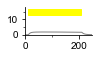

300 0.0005 abs light power in uW 3.3987220726437233


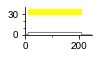

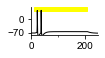

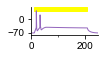

300 0.02 total integrated conductance in nS ms 6834.696483207928


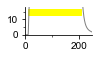

300 0.02 abs light power in uW 135.94888290574892


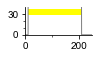

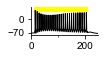

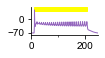

1


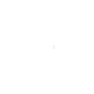

1


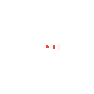

1


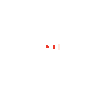

1


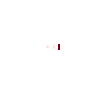

In [4]:
# top view on neuron
length = pw/3
width = pw/3
fig = plt.figure(constrained_layout=False, figsize=(width,length))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=1, wspace=0)
ax1 = fig.add_subplot(gs[0,0])

collectionL5_top = cell.plot_foutz2012(
    func=lambda x:1, axes='xy',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=neuron_color, shift_x=N1_x, shift_y=N1_y, alpha=0.5)
ax1.add_collection(collectionL5_top)
# rectangle for scaling
#rectangle = plt.Rectangle((500,600), 50, 200,color='tab:gray',alpha=0.8, edgecolor=None)
#ax1.add_patch(rectangle)
ax1.set_xlim(*cortex_boundaries['x'])
ax1.set_ylim(*cortex_boundaries['y'])
# turn axes off for neuron and light 6isplay
ax1.set_axis_off()
ax1.set_aspect('equal')
fig.savefig('paper/NEW_FIGURES/FIG2/plots/neuron_top.png', dpi=dpi, 
            facecolor=None, edgecolor=None,  
            bbox_inches='tight')
plt.show()

# simulations for different light source offset
APCs = dict()
for ls_offset in ls_offsets:
    # light setup
    light_model = 'foutz_et_al2012'

    light_delay = 10
    light_duration = 200
    tot_rec_time = 250

    AP_threshold = 0 # mV
    interpol_dt = 0.1

    display_left_spines = True
    display_legend = False
    chanrhod_distribution = 'uniform'
    radius = ls_offset
    angle = np.pi/4

    # lgiht source
    light_x, light_y = convert_polar_to_cartesian_xz(radius, angle)
    light_z = 0  # cortical surface
    light_pos = (light_x, light_y, light_z)
    light_source = LightSource(
        model=str(light_model),
        position=(light_x, light_y, light_z),
        width=d__um,
        NA=NA
    )
    
    
    APCs[ls_offset] = dict()
    # top view neuron and light source positions plots
    length = pw/5
    width = pw/5
    fig = plt.figure(constrained_layout=False, figsize=(width,length))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=1, wspace=0)
    ax1 = fig.add_subplot(gs[0,0])
    collectionL5_top = cell.plot_foutz2012(
        func=lambda x:1, axes='xy',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=neuron_color, shift_x=N1_x, shift_y=N1_y)
    ax1.add_collection(collectionL5_top)
    # plot light source
    circle1 = plt.Circle((500+light_x, 500+light_y), d__um/2, color='tab:gray',zorder=2,alpha=0.8, edgecolor=None)
    ax1.add_patch(circle1)
    ax1.set_xlim(*cortex_boundaries['x'])
    ax1.set_ylim(*cortex_boundaries['y'])
    # turn axes off for neuron and light display
    ax1.set_axis_off()
    ax1.set_aspect('equal')
    fig.savefig('paper/NEW_FIGURES/FIG2/plots/neuron_light_top_'+str(ls_offset)+'.png', dpi=dpi, 
                facecolor=None, edgecolor=None,  
                bbox_inches='tight')
    plt.show()
    
    # side view
    # side view neuron and light position plots
    length = 2 * pw/5
    width = pw/5
    fig = plt.figure(constrained_layout=False, figsize=(width,length))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=1, wspace=0)
    ax1 = fig.add_subplot(gs[0,0])


    # light source
    length_light_source = 500
    rectangle = plt.Rectangle((500+ls_offset-d__um/2, 0), d__um, length_light_source,color='tab:gray',alpha=0.8, edgecolor=None)
    ax1.add_patch(rectangle)

    # Foutz optical fiber light source
    xx, zz = np.meshgrid(np.arange(cortex_boundaries['x'][0],cortex_boundaries['x'][1]),
                         np.arange(cortex_boundaries['z'][0],cortex_boundaries['z'][1]))
    L1_prof = foutz_et_al2012(
        x=xx-L1_x-ls_offset, y=np.zeros(np.shape(xx)), z=zz, power=1, 
        width=d__um, NA=NA)
    # for LogNorm set all 0 to 1e-10
    L1_prof[L1_prof==0] = 1e-10
    # normalize light_profile by average output intensity
    # 1W/cm2 light power / (pi * diam_in_cm/2)**2
    avrg_output_intensity = 1 / (np.pi * (d__um/2 * 1e-4)**2)
    L1_prof /= avrg_output_intensity
    # set light above z=0 to max to get white profile
    L1_prof [0:500,:]=np.max(L1_prof)
    # display 500 um bar for scale
    #L1_prof[300:800,770:800]=np.max(L1_prof)
    #L1_prof[770:800,300:800]=np.max(L1_prof)

    # add cortical layer boundaries
    cortical_layer_boundaries = -1*cortex_boundaries['z'][0] + np.array([0, 150, 630, 950, 1200, 1520])
    for bound in cortical_layer_boundaries:
        L1_prof[bound:bound+2,:] = np.max(L1_prof)

    collectionL5_side = cell.plot_foutz2012(
        func=lambda x:1, axes='xz',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=neuron_color, shift_x=N1_x)

    ax1.add_collection(collectionL5_side)
    bounds_cmap = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    mappable = ax1.pcolormesh(xx,zz*-1,L1_prof, shading='nearest', cmap=cmap,
                  #norm=LogNorm(vmin=6300e-4,vmax=63000)
                  norm=BoundaryNorm(bounds_cmap,ncolors=cmap.N,extend='both')
    )
    #ax1.set_xlim(*cortex_boundaries['x']) 
    #ax1.set_ylim(-1*(cortex_boundaries['x'][1]-cortex_boundaries['x'][0]),0)
    ax1.set_xlim(*cortex_boundaries['x'])
    ax1.set_ylim(-1*cortex_boundaries['z'][1],-1*cortex_boundaries['z'][0])
    #ax1.set_ylim(-2000,500)
    # turn axes off for neuron and light display
    ax1.set_axis_off()
    ax1.set_aspect('equal')
    fig.savefig('paper/NEW_FIGURES/FIG2/plots/neuron_light_side_'+str(ls_offset)+'.png', dpi=dpi, 
                facecolor=None, edgecolor=None,  
                bbox_inches='tight')
    plt.show()
    
    # voltage traces
    # define interesting sections to measure (soma always included)
    extra_rec_var_names = ['apical'] # apdend, soma, badend 
    extra_rec_var_pointers = [h.dend11[75](0.5)._ref_v]
    # define conductane recording variables
    # define measurement variables
    segs = [seg for sec in h.allsec() for seg in sec][:-1] # exclude last seg as it is the light source
    segcatpointernames = [str(seg) for seg in segs]
    segcatpointers = [eval('h.'+str(seg)+'._ref_gcat_chanrhod') for seg in segs]
    extra_rec_var_names.extend(segcatpointernames)
    extra_rec_var_pointers.extend(segcatpointers)
    
    for lp in light_powers:
        light_stim = LightStimulation(
            cell=cell,
            light_source=light_source,
            delay=float(light_delay),
            duration=float(light_duration),
            light_power=float(lp),
            record_all_segments=False,
        )
        # perform stimulation and record data
        measurement = pd.DataFrame(
            light_stim.simulate_and_measure(
                tot_rec_time=float(tot_rec_time),
                extra_rec_var_names=extra_rec_var_names,
                extra_rec_var_pointers=extra_rec_var_pointers,
            )
        )
        # drop full row duplicates:
        measurement = measurement.drop_duplicates()
        # add 1e-12 ms to 2nd entry of 2 entries with the same time but different values
        measurement.loc[measurement["time [ms]"].diff() == 0, "time [ms]"] += 1e-12
        measurement = interpolate(
            df=measurement, interpolation_dt=float(interpol_dt)
        )
        AP_times = get_AP_times(
            df=measurement,
            interpol_dt=float(interpol_dt),
            t_on=float(light_delay),
            AP_threshold=AP_threshold
        )
        # convert density conductance into real conductance for each segment
        for seg, seg_gcat in zip(segs, segcatpointernames):
            measurement[seg_gcat] *= eval('h.'+str(seg)+'.area()') * 1e-8 # eval area of segment and convert from um2 to cm2
        t_sec_g = pd.melt(measurement, id_vars=['time [ms]'], value_vars=segcatpointernames).set_index(['variable', 'time [ms]'])
        total_conductance = t_sec_g.groupby(['time [ms]']).sum().reset_index() # S (gcat is given in S/cm2 and multiplied wit area in cm2
        total_conductance['value'] = total_conductance['value'] * 1e9  # convert conductance to nS
        print(ls_offset, lp, 'total integrated conductance in nS ms', np.sum(total_conductance['value'].values[1:]*np.diff(total_conductance['time [ms]'].values)))
        # plot total conductance lineplot
        fig, ax = plt.subplots(figsize=(pw/5,pw/10), gridspec_kw=dict(left=0.2, bottom=0.3))
        ax.plot(total_conductance['time [ms]'], total_conductance['value'], lw=1, c='gray')
        rectangle = plt.Rectangle((10,13), 200, 4,color='#ffff00ff',alpha=1, edgecolor=None)
        ax.add_patch(rectangle)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_yticks([0,10])
        ax.set_yticks([5,15], minor=True)
        ax.set_ylim(0,18)
        ax.set_xlim(0,250)
        ax.set_xticks([0,200])
        ax.set_xticks([100], minor=True)
        fig.savefig(
                '_'.join(['paper/NEW_FIGURES/FIG2/plots/total_conductance',str(ls_offset),str(lp),'.png']),
                dpi=dpi,
                facecolor=None, 
                edgecolor=None,
                bbox_inches='tight')
        plt.show()
        # plot absorbed light intensity lineplots
        fig, ax = plt.subplots(figsize=(pw/5,pw/10), gridspec_kw=dict(left=0.2, bottom=0.3))
        absorbed_light_power_uW = np.sum(
            [seg.area()*1e-8 * Tx * lp*1e6 for seg, Tx in zip(*light_stim.get_segs_Txs())]
        ) #  area in cm2  * light_loss in 1/cm2 * light_emission_power in uW
        print(ls_offset, lp, 'abs light power in uW',absorbed_light_power_uW)
        light_on = (measurement['time [ms]'].values >= light_delay) == (measurement['time [ms]'].values <= light_delay+light_duration)
        ax.plot(measurement['time [ms]'], light_on*absorbed_light_power_uW, lw=1, c='gray')
        rectangle = plt.Rectangle((10,30), 200, 7,color='#ffff00ff',alpha=1, edgecolor=None)
        ax.add_patch(rectangle)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_yticks([0,30])
        ax.set_yticks([10,20], minor=True)
        ax.set_ylim(0,40)
        ax.set_xlim(0,250)
        ax.set_xticks([0,200])
        ax.set_xticks([100], minor=True)
        fig.savefig(
                '_'.join(['paper/NEW_FIGURES/FIG2/plots/light_energy_absorbed',str(ls_offset),str(lp),'.png']),
                dpi=dpi,
                facecolor=None, 
                edgecolor=None,
                bbox_inches='tight')
        plt.show()
        # plot voltage traces
        for var, label, color in zip(['V_soma(0.5)', 'apical'],['soma','apical'],['black','tab:purple']):
            fig, ax = plt.subplots(figsize=(pw/5,pw/10), gridspec_kw=dict(left=0.2, bottom=0.3))
            ax.plot(measurement['time [ms]'], measurement[var], label=label,lw=1, c=color)
            rectangle = plt.Rectangle((10,40), 200, 20,color='#ffff00ff',alpha=1, edgecolor=None)
            ax.add_patch(rectangle)
            #ax.set_ylabel('mV')
            #ax.set_xlabel('time [ms]')

            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_yticks([-70,0])
            ax.set_ylim(-80,60)
            ax.set_xlim(0,250)
            ax.set_xticks([0,200])
            ax.set_xticks([100], minor=True)

            if display_legend:
                ax.legend()

            fig.savefig(
                    '_'.join(['paper/NEW_FIGURES/FIG2/plots/voltage_prof_L5',str(ls_offset),str(lp),label,'.png']),
                    dpi=dpi,
                    facecolor=None, 
                    edgecolor=None,
                    bbox_inches='tight')
            plt.show()
        n_AP = len(AP_times)
        if n_AP == 0:
            # set to NaN if zero for plotting reasons
            n_AP = np.nan
        APCs[ls_offset][lp] = n_AP

def spatial_response_illustr(ls_offset, APC, lp):
        if type(lp) != list:
            lp = [lp]
        if type(ls_offset) != list:
            ls_offset = [ls_offset]
        if type(APC) != dict:
            APC = dict(ls_offset=dict(lp=APC))
        radii = np.arange(0,1000,25)
        angles = np.arange(0,2*np.pi,np.pi/8)
        rr, angang = np.meshgrid(radii, angles)
        df = pd.DataFrame(columns=['radius [um]', 'angle [rad]', 'AP_count'], dtype=float).set_index(['radius [um]', 'angle [rad]'])
        for r, ang in zip(rr.flatten(), angang.flatten()):
            df.loc[(r,ang),'AP_count'] = np.nan
        # fill simulated values:
        for lp_ in lp:
            for ls_offset_ in ls_offsets:
                if ls_offset_ ==0:
                    print(1)
                    for ang_ in angles:
                        df.loc[(ls_offset_,ang_),'AP_count'] = APC[ls_offset_][lp_]
                else:
                    df.loc[(ls_offset_,0),'AP_count'] = APC[ls_offset_][lp_]
        fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
        gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                                wspace=0.05)
        ax = fig.add_subplot(gs[0,0], projection="polar")
        ax, mappable = simple_polar_map(
            data=df.reset_index(),
            plot_col='AP_count',
            cmap= Reds,
            ax=ax,
            vmin=0,
            vmax=27)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.spines['polar'].set_visible(False)
        ax.grid()
        fig.savefig('paper/NEW_FIGURES/FIG2/plots/spatial_response_L5_'+str(ls_offset)+'_'+str(lp)+'.png', dpi=dpi, 
                    facecolor=None, edgecolor=None,  
                    bbox_inches='tight')
        plt.show()
for lp in light_powers:
    spatial_response_illustr(ls_offsets, APCs, lp)

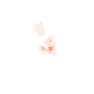

8.0


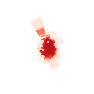

17.0


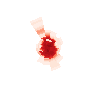

18.0


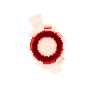

26.0


In [4]:
# pre-simulated full spatial profiles
#L5_data = pd.read_pickle('data/2022-08-04_L5/all_data.pickle')
L5_data = pd.read_hdf('data/2023-05-29_FIG2B/all_data.hdf')

# select relevant data from data frame
#ChR_expr_lvl = 10354945 # this is 130um-2 at soma for uniform distrib
chanrhod_expression = 13e9
chanrhod_distribution = 'uniform'
# light model and params
light_model = 'foutz_et_al2012'
diam = 200
NA = 0.22 
# other
stim_duration = 200 # ms
# apply selection
L5_data = L5_data.loc['L5',light_model,chanrhod_distribution,
                      chanrhod_expression,diam, NA, stim_duration]
# mask all values at 0 to be displayed white
L5_data.loc[L5_data.AP_count==0] = np.nan
#light_powers = [0.009]
for lp in light_powers:
    # L5
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
        data=L5_data.loc[lp].reset_index(),
        plot_col='AP_count',
        cmap= Reds,
        ax=ax,
        vmin=0,
        vmax=20)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.grid()
    fig.savefig('paper/NEW_FIGURES/FIG2/plots/full_spatial_response_L5_'+str(lp)+'.png', dpi=dpi, 
                facecolor=None, edgecolor=None,  
                bbox_inches='tight')
    plt.show()
    print(L5_data.loc[lp].AP_count.max())

In [9]:
len(L5_data.loc[0.00005].reset_index()['angle [rad]'].unique())

16

<AxesSubplot:xlabel='radius [um]'>

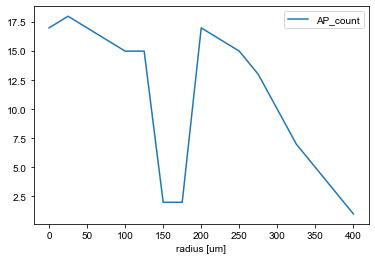

In [52]:
# response magnitude high also at off center location,e.g. 
# 10 spikes / 50 Hz at 300 µm offset upwards
angle_vals = L5_data.reset_index()['angle [rad]'].unique()
L5_data.loc[0.0005,:,angle_vals[4]].reset_index().plot(x='radius [um]', y='AP_count')

In [48]:
# otherwise median with 200 um offset is high with 17 spikes / 85 Hz:
L5_data.loc[0.0005,:200,:]['AP_count'].median()

17.0

In [54]:
L5_data.loc[0.0005,:,:].groupby('radius [um]')['AP_count'].mean()

radius [um]
0      17.000000
25     17.375000
50     17.312500
75     16.937500
100    16.437500
125    15.750000
150    13.562500
175    11.375000
200    12.250000
225    12.214286
250     9.214286
275     7.272727
300     4.545455
325     3.666667
350     3.000000
375     2.375000
400     2.166667
425     3.000000
450     3.333333
475     4.000000
500     2.500000
525     2.500000
550     2.000000
575     1.000000
600     1.000000
625     1.000000
650     1.000000
675     2.000000
700     2.000000
725     1.000000
750          NaN
775          NaN
800          NaN
825          NaN
850          NaN
875          NaN
900          NaN
925          NaN
950          NaN
975          NaN
Name: AP_count, dtype: float64

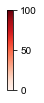

In [9]:
fig, ax = plt.subplots(figsize=(pw/30, pw/4.5))
plt.colorbar(mappable, cax=ax, ticks=[])
fig.savefig('paper/NEW_FIGURES/FIG2/plots/colorbar.png', dpi=dpi, 
                facecolor=None, edgecolor=None,  
                bbox_inches='tight')
fig, ax = plt.subplots(figsize=(pw/60, pw/4.5))
ticks = [0,10,20]
ticks_labels_Hz = [str(int(tick)) for tick in np.array(ticks)/0.2]
cbar = plt.colorbar(mappable, cax=ax, ticks=ticks)
cbar.set_ticklabels(ticks_labels_Hz)
fig.savefig('paper/NEW_FIGURES/FIG2/plots/colorbar_w_ticks.png', dpi=dpi, 
                facecolor=None, edgecolor=None, 
                bbox_inches='tight')


/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

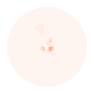

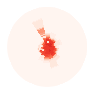

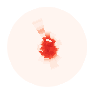

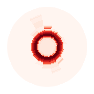

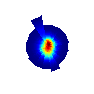

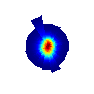

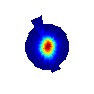

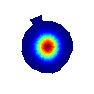

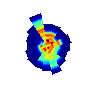

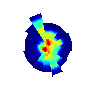

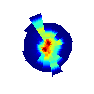

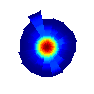

In [9]:
# plot conductance profiles
import pandas as pd
import numpy as np
import copy
import matplotlib.colors
from neurostim.polarmaps import simple_polar_map
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_hdf('data/conductance_prof/all_data.hdf')
df = df.reset_index()[['light_power', 'radius [um]','angle [rad]','AP_count','total_int_g','total_peak_g','max_int_sec_g']]
df['norm_total_int_g'] = df.groupby(['light_power'])['total_int_g'].apply(lambda x: x/x.max())
df['norm_total_peak_g'] = df.groupby(['light_power'])['total_peak_g'].apply(lambda x: x/x.max())
df['norm_max_int_sec_g'] = df.groupby(['light_power'])['max_int_sec_g'].apply(lambda x: x/x.max())
df = df.set_index(['light_power', 'radius [um]', 'angle [rad]'])

df['norm_total_int_g'].loc[df['norm_total_int_g']<=0.001] = np.nan
df['norm_total_peak_g'].loc[df['norm_total_peak_g']<=0.001] = np.nan
df['norm_max_int_sec_g'].loc[df['norm_max_int_sec_g']<=0.001] = np.nan
cmap = copy.copy(mpl.cm.get_cmap("jet"))
cmap.set_bad(color='white')

lps = df.reset_index().light_power.unique()
lps = [5e-5,3e-4,5e-4,2e-2]

# firing rate (AP_count)
for lp in lps:
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
            data=df.loc[lp].reset_index(),
            plot_col='AP_count',
            cmap=copy.copy(mpl.cm.get_cmap("Reds")),
            ax=ax,
            vmin=0,
            vmax=25)
    #plt.colorbar(mappable)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    #plt.title(str(lp))
    plt.savefig('paper/NEW_FIGURES/FIG2/plots/tmp_fr_'+str(lp)+'.png', dpi=dpi)
    plt.show()
# total conductance of all compartments
for lp in lps:
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
            data=df.loc[lp].reset_index(),
            plot_col='norm_total_int_g',
            cmap=cmap,
            ax=ax,
            vmin=0,
            vmax=1)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    #plt.colorbar(mappable)
    #plt.title(str(lp))
    plt.savefig('paper/NEW_FIGURES/FIG2/plots/tmp_cond_'+str(lp)+'.png', dpi=dpi)
    plt.show()
# max conductance in one compartment
for lp in lps:
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
            data=df.loc[lp].reset_index(),
            plot_col='norm_max_int_sec_g',
            cmap=cmap,
            ax=ax,
            vmin=0,
            vmax=1)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    #plt.colorbar(mappable)
    #plt.title(str(lp))
    plt.savefig('paper/NEW_FIGURES/FIG2/plots/tmp_max_cond_'+str(lp)+'.png', dpi=dpi)
    plt.show()

/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


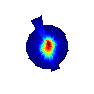

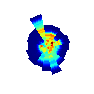

In [10]:
light_energy_absorbed = []
for radius in np.arange(0,1000,25):
    for angle in np.arange(0,2*np.pi,np.pi/8):
        # light source initialization
        light_x, light_y = convert_polar_to_cartesian_xz(radius, angle)
        light_z = 0  # cortical surface
        light_pos = (light_x, light_y, light_z)
        light_source = LightSource(
            model=light_model,
            position=(light_x, light_y, light_z),
            width=float(diam),
            NA=float(NA)
        )
        # stimulation object initialization
        light_stim = LightStimulation(
            cell=cell,
            light_source=light_source,
            delay=1,
            duration=200,
            light_power=1,
            record_all_segments=False,
        )
        segs, Txs = light_stim.get_segs_Txs()
        light_energy_absorbed.append({
            'radius [um]': radius,
            'angle [rad]': angle,
            'total_light_energy_absorbed': np.sum([seg.area() * Tx for seg, Tx in zip(segs, Txs)]),
            'max_seg_light_energy_absorbed': np.max([seg.area() * Tx for seg, Tx in zip(segs, Txs)])
        })
lea_df = pd.DataFrame(light_energy_absorbed)
lea_df['total_light_energy_absorbed'] = lea_df['total_light_energy_absorbed'] / lea_df['total_light_energy_absorbed'].max()
lea_df['max_seg_energy_absorbed'] = lea_df['max_seg_light_energy_absorbed'] / lea_df['max_seg_light_energy_absorbed'].max()
lea_df['total_light_energy_absorbed'].loc[lea_df['total_light_energy_absorbed']<=0.001] = np.nan
lea_df['max_seg_energy_absorbed'].loc[lea_df['max_seg_energy_absorbed']<=0.001] = np.nan
# total light energy absorbed by the neuron
fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                        wspace=0.05)
ax = fig.add_subplot(gs[0,0], projection="polar")
ax, mappable = simple_polar_map(
        data=lea_df,
        plot_col='total_light_energy_absorbed',
        cmap=cmap,
        ax=ax,
        vmin=0,
        vmax=1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
#plt.colorbar(mappable)
#plt.title(str(lp))
plt.savefig('paper/NEW_FIGURES/FIG2/plots/tmp_total_lea.png', dpi=dpi)
plt.show()
# total light energy absorbed by the neuron
fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                        wspace=0.05)
ax = fig.add_subplot(gs[0,0], projection="polar")
ax, mappable = simple_polar_map(
        data=lea_df,
        plot_col='max_seg_energy_absorbed',
        cmap=cmap,
        ax=ax,
        vmin=0,
        vmax=1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)
#plt.colorbar(mappable)
#plt.title(str(lp))
plt.savefig('paper/NEW_FIGURES/FIG2/plots/tmp_max_seg_lea.png', dpi=dpi)
plt.show()